<a href="https://colab.research.google.com/github/PaulaPineroCouceiro/deeplearning/blob/main/ejercicio3comen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRÁCTICA 3

## Objetivo

Existen casos en que las variables no se pueden representar visualmente debido a que necesitaríamos varias dimensiones para ello. Para evitar esto, existe una metodología en la cual, un set de datos multidimensional, podemos transformarlo para poder explicar gran parte de la información en 2 o 3 dimensiones. Dicha metodología se conoce con el nombre de Principal Component Analysis (PCA). Vamos a aplicarlo a un set de datos que está colgado en Moodle y vamos a dar una serie de explicaciones de que ocurre.

## EJERCICIO 1

Lo primero que habrá que hacer será estandarizar los datos para que las diferencias de rango no supongan un problema a la hora de procesar la información. Usa para ello el método StandardScaler de la librería scikit-learn.

In [5]:
import pandas as pd
from copy import deepcopy
datos = pd.read_csv('pokemon.csv')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
datos.head(200)

,Pokémon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,2,3,2,4,2,4
1,PONYTA,Fuego,2,3,2,2,2,3
2,TORKOAL,Fuego,2,3,4,3,2,1
3,ARCANINE,Fuego,3,5,3,4,3,4
4,STARMIE,Agua,2,3,3,4,2,4
5,PALKIA,Agua,3,4,3,5,3,4
6,MILOTIC,Agua,3,2,2,4,3,3
7,AZUMARILL,Agua,3,2,2,2,2,2
8,LEAFEON,Planta,2,4,4,2,2,3
9,ABOMASNOW,Planta,3,3,2,3,2,2


In [ ]:
datos_iniciales = deepcopy(datos)

Eliminamos las columnas 'Pokémon' y 'Tipo', ya que son categóricas y si no las eliminamos, no podremos estandarizar los datos.

In [9]:
pokemon = datos.pop('Pokémon')
tipo = datos.pop('Tipo')

In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datos_std = pd.DataFrame(scaler.fit_transform(datos))

In [11]:
datos_std.head(200)

,0,1,2,3,4,5
0,-0.326164,0.054313,-0.75,0.564152,-0.50,1.037975
1,-0.326164,0.054313,-0.75,-1.171700,-0.50,0.135388
2,-0.326164,0.054313,1.75,-0.303774,-0.50,-1.669787
3,0.978492,2.226814,0.50,0.564152,0.75,1.037975
4,-0.326164,0.054313,0.50,0.564152,-0.50,1.037975
5,0.978492,1.140563,0.50,1.432078,0.75,1.037975
6,0.978492,-1.031938,-0.75,0.564152,0.75,0.135388
7,0.978492,-1.031938,-0.75,-1.171700,-0.50,-0.767199
8,-0.326164,1.140563,1.75,-1.171700,-0.50,0.135388
9,0.978492,0.054313,-0.75,-0.303774,-0.50,-0.767199


Vemos aquí que las variables tienen media 0 y desviación típica 1.

In [12]:
print(datos_std.mean(axis=0))
print(datos_std.std(axis=0))

0    1.110223e-17
1   -1.998401e-16
2   -1.498801e-16
3   -9.992007e-17
4    1.360023e-16
5   -7.771561e-17
dtype: float64
0    1.025978
1    1.025978
2    1.025978
3    1.025978
4    1.025978
5    1.025978
dtype: float64


## EJERCICIO 2

El segundo paso será a partir de los datos anteriores, obtener los autovalores (eigenvalues) y los autovectores (eigenvectors) que nos permitan explicar cuántos componentes necesitamos para representar los datos iniciales. Para ello primer habrá que obtener la matriz de covarianza mediante el método cov de numpy y después aplicarle a dicha matriz el método linalg.eig también de numpy. Obten un DataFrame con el porcentaje de varianza y el acumulado por cada componente. Explica que quieren decir estos datos. ¿Cuánto información perdemos con 2 componentes? ¿Cuánta información representamos con 3 componentes?

In [13]:
import numpy as np
from numpy.linalg import eig
cov_matrix = np.cov(datos_std.T)
# Obtener los autovalores y autovectores de la matriz de covarianza
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Calcular el porcentaje de varianza explicada por cada componente
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
explained_variance_ratio_df = pd.DataFrame({'Explained Variance Ratio': explained_variance_ratio})
explained_variance_ratio_df = explained_variance_ratio_df.sort_values(by='Explained Variance Ratio', ascending=False)

# Calcular el porcentaje de varianza acumulado por cada componente
explained_variance_ratio_df['Cumulative Explained Variance Ratio'] = explained_variance_ratio_df['Explained Variance Ratio'].cumsum()


# Imprimir el DataFrame resultante
explained_variance_ratio_df.head(200)

,Explained Variance Ratio,Cumulative Explained Variance Ratio
0,0.416413,0.416413
1,0.245521,0.661935
5,0.123630,0.785565
4,0.113291,0.898856
3,0.075145,0.974001
2,0.025999,1.000000


Con 2 componentes perdemos un 33.81% de información aproximadamente.
Con 3 componentes representamos un 78.56% de la información.
Con 4 componentes, representamos casi el 90% de la información aproximadamente, lo cual ya es suficiente.

## EJERCICIO 3

Por último queremos representar gráficamente los individuos de nuestro dataset, pero usando los valores de las componentes principales obtenidas. Obtén un diagrama de dispersión en 2 dimensiones y comenta que has interpretado en él. Es necesario que el diagrama contenga toda la información necesaria. Habrá que interpreta que información proporciona el eje X y el eje Y. Por último, elegir al menos 4 individuos y explicar qué pasa con ellos.

Ordenamos los autovectores en función de los autovalores. Así podremos seleccionar los 2 que explican más varianza de los datos.

In [14]:
e_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:,e_indices]

In [15]:
k = 2 # select the number of principal components
reduced_data = np.matmul(datos_std, eigenvectors_sorted[:,:k]) # transform the original data

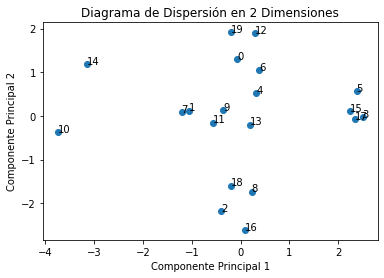

In [16]:
import matplotlib.pyplot as plt

# Supongamos que hemos calculado los componentes principales y los hemos almacenado en la matriz "componentes_principales"
x = reduced_data[0]
y = reduced_data[1]

# Supongamos que tenemos un DataFrame llamado "datos" con las etiquetas de cada individuo
plt.scatter(x, y)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Diagrama de Dispersión en 2 Dimensiones')
for i, txt in enumerate(datos.index):
    plt.annotate(txt, (x[i], y[i]))
plt.show()

In [18]:
datos_iniciales.iloc[[3,5,15,17]]

NameError: ignored

In [19]:
datos_iniciales.iloc[[2,8,16,18]]

NameError: ignored

In [ ]:
datos_iniciales.loc[[10,14]]

,Pokémon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
10,CHERUBI,Planta,1,1,2,2,1,1
14,PIKACHU,Eléctrico,1,2,1,2,1,3


In [ ]:
datos_iniciales.loc[[0,6,12,19]]

,Pokémon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,2,3,2,4,2,4
6,MILOTIC,Agua,3,2,2,4,3,3
12,JOLTEON,Eléctrico,2,2,2,4,3,5
19,GENGAR,Fantasma,2,2,2,5,2,4


In [ ]:
datos_iniciales.loc[[1,4,7,9,11,13]]

,Pokémon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
1,PONYTA,Fuego,2,3,2,2,2,3
4,STARMIE,Agua,2,3,3,4,2,4
7,AZUMARILL,Agua,3,2,2,2,2,2
9,ABOMASNOW,Planta,3,3,2,3,2,2
11,BRELOOM,Planta,2,4,2,2,2,3
13,MAGNEZONE,Eléctrico,2,3,3,5,2,2


Tras ver el mapa de dispersión, podemos observar 5 grupos:
En el eje horizontal:
- Los de la derecha (Arcanine, Palkia, Ampharos y Giratina) son Pokémon con mejores stats (y con más ataque que defensa).
- Los de la izquierda (Pikachu y Cherubi) son los Pokémon con peores stats.


## EJERCICIO 4

Realiza los mismos pasos que en los pasos anteriores usando la librería scikit-learn. Compara los resultados y coméntalos.

In [21]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Estándarizar los datos
escalador = StandardScaler()
datos_std = escalador.fit_transform(datos)


# Calcular las componentes principales
pca = PCA()
componentes_principales = pca.fit_transform(datos_std)

# Obtener el porcentaje de varianza explicada por cada componente
porcentaje_varianza_explicada = pca.explained_variance_ratio_

# Obtener el porcentaje acumulado de varianza explicada por cada componente
porcentaje_acumulado_varianza_explicada = np.cumsum(porcentaje_varianza_explicada)

# Crear un DataFrame con los porcentajes de varianza explicada
df_porcentajes = pd.DataFrame({'Porcentaje de Varianza Explicada': porcentaje_varianza_explicada,
                               'Porcentaje Acumulado de Varianza Explicada': porcentaje_acumulado_varianza_explicada})
df_porcentajes.index += 1

# Imprimir el DataFrame
print(df_porcentajes)


   Porcentaje de Varianza Explicada  \
1                          0.416413   
2                          0.245521   
3                          0.123630   
4                          0.113291   
5                          0.075145   
6                          0.025999   

   Porcentaje Acumulado de Varianza Explicada  
1                                    0.416413  
2                                    0.661935  
3                                    0.785565  
4                                    0.898856  
5                                    0.974001  
6                                    1.000000  


La salida de este código es un DataFrame con el porcentaje de varianza explicada por cada componente y el porcentaje acumulado de varianza explicada por cada componente. Si comparamos los resultados con los obtenidos anteriormente con numpy, podemos observar que son idénticos.

Por otro lado, para visualizar los datos en un diagrama de dispersión en 2 dimensiones usando las componentes principales obtenidas con scikit-learn, el proceso es similar al utilizado anteriormente. A continuación, se explica un ejemplo:

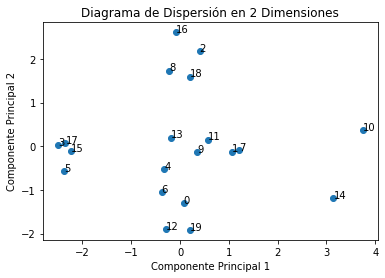

In [22]:
import matplotlib.pyplot as plt

# Supongamos que hemos calculado los componentes principales y los hemos almacenado en la matriz "componentes_principales"
x = componentes_principales[:, 0]
y = componentes_principales[:, 1]

# Supongamos que tenemos un DataFrame llamado "datos" con las etiquetas de cada individuo
plt.scatter(x, y)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Diagrama de Dispersión en 2 Dimensiones')
for i, txt in enumerate(datos.index):
    plt.annotate(txt, (x[i], y[i]))
plt.show()


En cuanto a la gráfica, podemos observar que el Pokemon 12 y 19, se encuentran cerca y que el 3 y el 10, están en extremos.


De nuevo, la interpretación de los resultados es igual a la explicada anteriormente si, le dieramos la vuelta por ambos lados. Es decir, que si el Pokemon 10, antes estaba en el (-0.5,-1) ahora en esta gráfica estaría en el (0.5,1).  La ventaja de utilizar scikit-learn es que podemos realizar todo el proceso en menos líneas de código y con una mayor eficiencia en el procesamiento de los datos.

RESPONDER A LAS PREGUNTAS!!!!!!!!